# Prepare San Juan data

In [1]:
import scipy as sp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline
import myutil_prep_iq as myutil
import warnings
warnings.filterwarnings('ignore')
import sys
print(sys.executable)

/Users/carlos2/anaconda/envs/dsdht/bin/python


In [2]:
import importlib
_ = importlib.reload(myutil)

## Prepare training data

In [3]:
dfx_train = myutil.get_indexed_dataset('data/dengue_features_train.csv')
dfy_train = myutil.get_indexed_dataset('data/dengue_labels_train.csv')
dftrain = myutil.set_index(pd.merge(dfx_train, dfy_train))
dftrain_iq, _ = myutil.split_dataset_by_city(dftrain)
dftrain_iq.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
yearweekofyear,,,,,,,,,,,,,,,,,,,,,
200026,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
200027,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
200028,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
200029,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
200030,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [4]:
# remove nans
dftrain_iq = myutil.set_nan_to_week_mean(dftrain_iq.copy())
dftrain_iq.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

###  Add total_cases as a feature

In [5]:
dftrain_iq = myutil.add_total_cases_feature(dftrain_iq)
dftrain_iq.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases2,total_cases
yearweekofyear,,,,,,,,,,,,,,,,,,,,,
200026,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0,0
200027,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0,0
200028,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0,0
200029,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0,0
200030,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0,0


###  Remove location and timescale features (since timescale is index)

In [6]:
dftrain_iq.drop(['city','year','weekofyear','week_start_date'], axis=1, inplace=True)
dftrain_iq.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases2,total_cases
yearweekofyear,,,,,,,,,,,,,,,,,,,,,
200026,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,293.1,...,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0,0
200027,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,291.1,...,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0,0
200028,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,304.5,292.6,...,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0,0
200029,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,303.6,288.6,...,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0,0
200030,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,307.0,291.5,...,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0,0


###  Remove features with 100% correlation

In [7]:
# Features “precipitation_amount_mm” and “reanalysis_sat_precip_amt_mm” were found to be 100% correlated (pearson), 
# so we drop the latter.
# Feature“reanalysis_dew_point_temp_k” and “reanalysis_specific_humidity_g_per_kg” are 99.85% correlated (pearson), 
# so we drop the latter.
dftrain_iq.drop(['reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg'], axis=1, inplace=True)
dftrain_iq.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases2,total_cases
yearweekofyear,,,,,,,,,,,,,,,,,,,,
200026,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,293.1,43.19,92.418571,8.928571,26.400000,10.775000,32.5,20.7,3.0,0,0
200027,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,291.1,46.00,93.581429,10.314286,26.900000,11.566667,34.0,20.8,55.6,0,0
200028,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,304.5,292.6,64.77,95.848571,7.385714,26.800000,11.466667,33.0,20.7,38.1,0,0
200029,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,303.6,288.6,23.96,87.234286,9.114286,25.766667,10.533333,31.5,14.7,30.0,0,0
200030,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,307.0,291.5,31.80,88.161429,9.500000,26.600000,11.480000,33.3,19.1,4.0,0,0


### Convert all temperature features to Celsius

In [8]:
dftrain_iq = myutil.convert_k_to_celsius(dftrain_iq.copy())
dftrain_iq.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases2,total_cases
yearweekofyear,,,,,,,,,,,,,,,,,,,,
200026,0.192886,0.132257,0.340886,0.247200,25.41,23.590000,25.300000,22.034286,34.15,19.95,43.19,92.418571,8.928571,26.400000,10.775000,32.5,20.7,3.0,0,0
200027,0.216833,0.276100,0.289457,0.241657,60.61,23.484286,25.278571,22.208571,33.45,17.95,46.00,93.581429,10.314286,26.900000,11.566667,34.0,20.8,55.6,0,0
200028,0.176757,0.173129,0.204114,0.128014,55.52,23.265714,24.242857,22.472857,31.35,19.45,64.77,95.848571,7.385714,26.800000,11.466667,33.0,20.7,38.1,0,0
200029,0.227729,0.145429,0.254200,0.200314,5.60,22.207143,23.078571,19.647143,30.45,15.45,23.96,87.234286,9.114286,25.766667,10.533333,31.5,14.7,30.0,0,0
200030,0.328643,0.322129,0.254371,0.361043,62.76,23.282857,24.485714,20.807143,33.85,18.35,31.80,88.161429,9.500000,26.600000,11.480000,33.3,19.1,4.0,0,0


### Update outliers

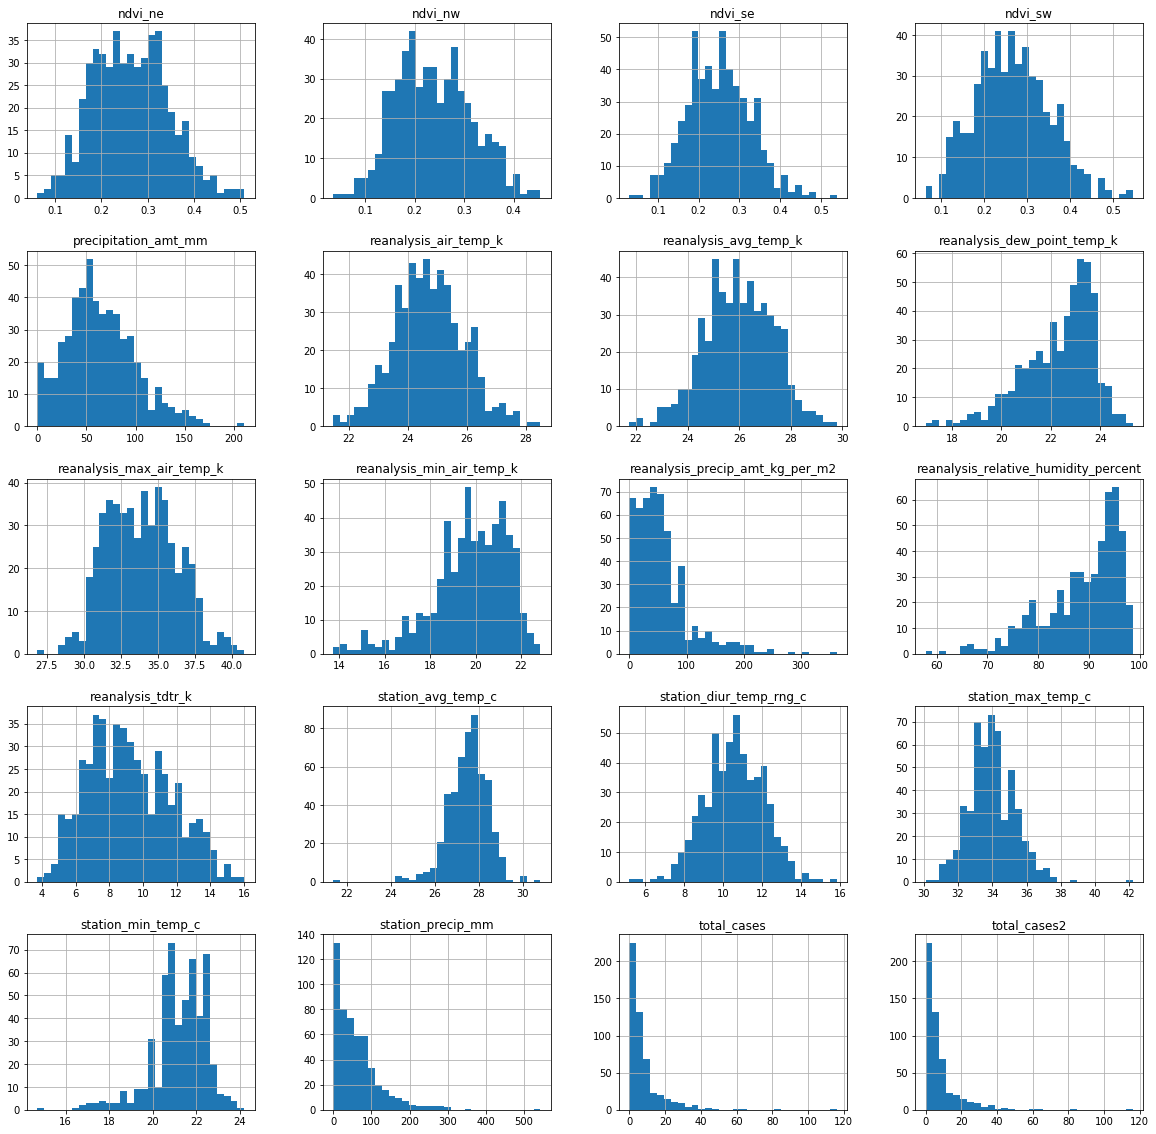

In [9]:
_ = dftrain_iq.hist(bins=30, figsize=(20,20))

#### Analyze distributions: normal/not normal?  skewed?  which way?

In [10]:
#scipy.stats.skew(a, axis=0, bias=True)
cols = dftrain_iq.columns
normal_cols = list()
not_normal_cols = list()
for col in dftrain_iq.columns:
    _, pvalue = sp.stats.skewtest(dftrain_iq[col].values)
    skewness = sp.stats.skew(dftrain_iq[col].values)
    if pvalue < 0.05:
        not_normal_cols.append((col, pvalue, skewness))
    else:
        normal_cols.append((col, pvalue, skewness))
    
print('Not normal columns\tpvalue\tskewness:')
for col, pvalue, skewness in not_normal_cols:
    print(col, '\t', round(pvalue,2), '\t', round(skewness,2))
    
print('\nNormal columns\tpvalue\tskewness:')
for col, pvalue, skewness in normal_cols:
    print(col, '\t', round(pvalue,2), '\t', round(skewness,2))


Not normal columns	pvalue	skewness:
ndvi_ne 	 0.03 	 0.23
ndvi_nw 	 0.03 	 0.24
ndvi_se 	 0.01 	 0.27
ndvi_sw 	 0.01 	 0.27
precipitation_amt_mm 	 0.0 	 0.6
reanalysis_dew_point_temp_k 	 0.0 	 -0.89
reanalysis_min_air_temp_k 	 0.0 	 -0.96
reanalysis_precip_amt_kg_per_m2 	 0.0 	 2.0
reanalysis_relative_humidity_percent 	 0.0 	 -1.11
reanalysis_tdtr_k 	 0.01 	 0.3
station_avg_temp_c 	 0.0 	 -0.91
station_max_temp_c 	 0.0 	 0.63
station_min_temp_c 	 0.0 	 -1.15
station_precip_mm 	 0.0 	 2.23
total_cases2 	 0.0 	 3.99
total_cases 	 0.0 	 3.99

Normal columns	pvalue	skewness:
reanalysis_air_temp_k 	 0.34 	 0.1
reanalysis_avg_temp_k 	 0.29 	 -0.11
reanalysis_max_air_temp_k 	 0.12 	 0.17
station_diur_temp_rng_c 	 0.54 	 -0.07


#### Update outliers for non normal distributions

In [11]:
# update outliers for non-normal distributions
for col, _, skewness in not_normal_cols:
    if col == 'total_cases':
        # will not update flag
        pass
    else:
        #print(col)
        allvals = dftrain_iq[col].values
        if skewness >= 1:
            #print('right tail')
            # if skewness >= 1 consider distribution long tail
            # squoosh long tail to 95% percentile value of original distribution
            maxallowed = np.percentile(allvals, 95)
            dftrain_iq.loc[dftrain_iq[col] > maxallowed, col] = maxallowed
        elif skewness <= -1:
            #print('left tail')
            # if skewness <= -1 consider distribution long tail
            # squoosh long tail to 5% percentile value of original distribution
            minallowed = np.percentile(allvals, 5)
            dftrain_iq.loc[dftrain_iq[col] < minallowed, col] = minallowed
        elif abs(skewness) < 1:
            #print('two sided')
            # mild skewness, squoosh outliers on both tails
            maxallowed = np.percentile(allvals, 97.5)
            dftrain_iq.loc[dftrain_iq[col] > maxallowed, col] = maxallowed
            minallowed = np.percentile(allvals, 2.5)
            dftrain_iq.loc[dftrain_iq[col] < minallowed, col] = minallowed
    

#### Update outliers for normal distributions

In [12]:
from outliers import smirnov_grubbs as grubbs

# for normal distributions, use two tail grubbs test to find outliers, if any
for col, _, skewness in normal_cols:
    #print(col)
    allvals = dftrain_iq[col].values
    allvalset = set(allvals)
    invalset = set(grubbs.test(allvals, alpha=0.05))
    outliers = allvalset - invalset
    maxallowed = max(invalset)
    minallowed = min(invalset)
    if len(outliers):
        #print(outliers)
        #print(maxallowed)
        #print(minallowed)
        dftrain_iq.loc[dftrain_iq[col] > maxallowed, col] = maxallowed
        dftrain_iq.loc[dftrain_iq[col] < minallowed, col] = minallowed

#### View results

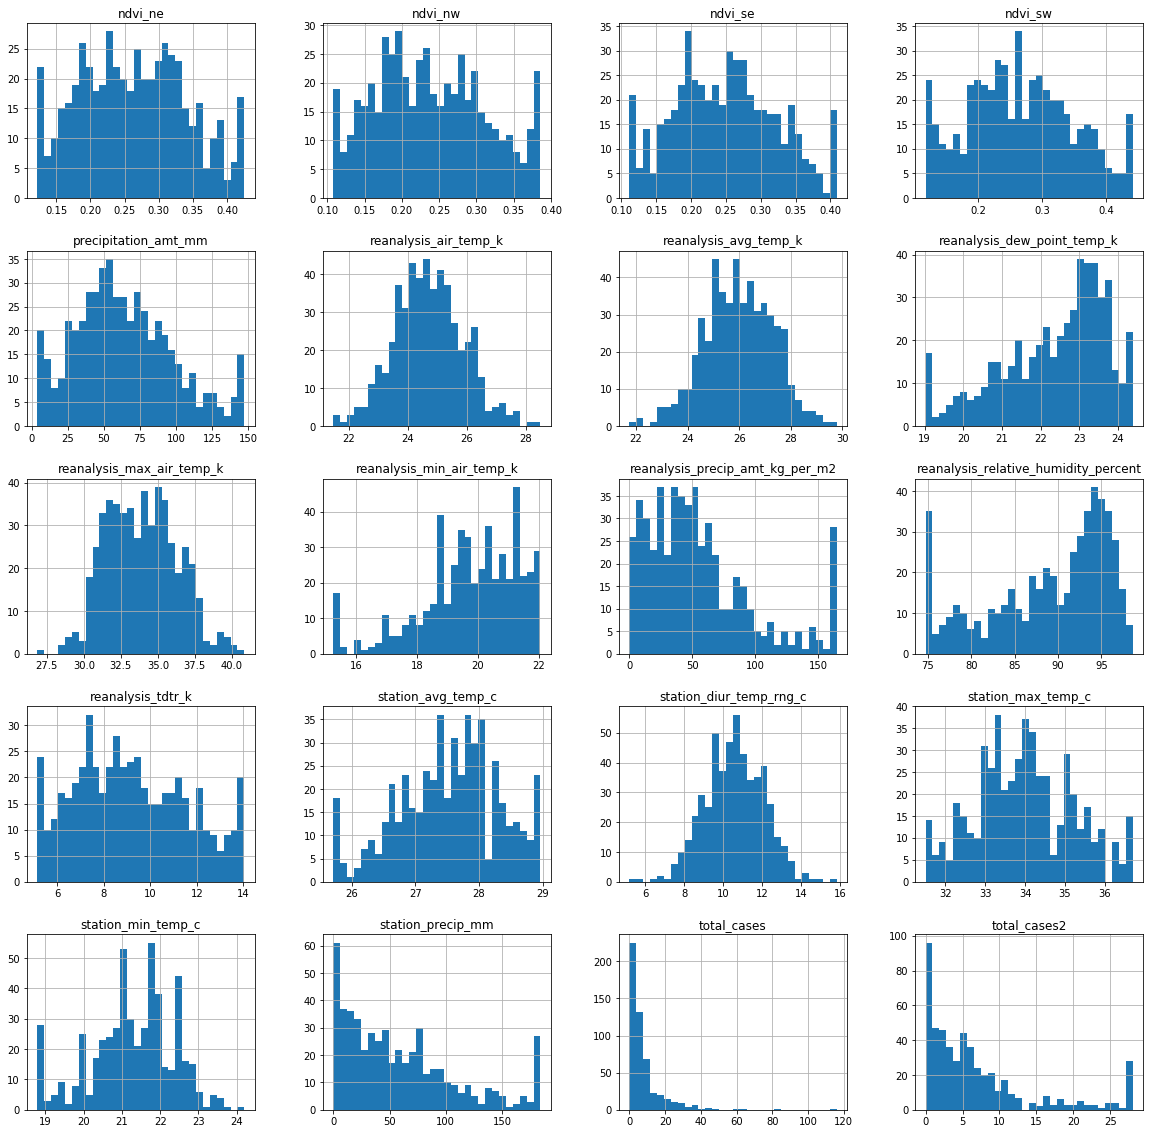

In [13]:
_ = dftrain_iq.hist(bins=30, figsize=(20,20))

## Save training data

In [14]:
dftrain_iq.iloc[:,:-1].to_csv('data/dengue_features_train_no_outliers_iq.csv')
dftrain_iq.iloc[:,-1:].to_csv('data/dengue_labels_train_iq.csv')

======================================================================================================================

## Prepare test data

In [15]:
dfx_test = myutil.get_indexed_dataset('data/dengue_features_test.csv')
dfx_test = dfx_test[dfx_test['city']=='iq']
dfx_test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
yearweekofyear,,,,,,,,,,,,,,,,,,,,,
201026,iq,2010,26,2010-07-02,0.183783,0.142500,0.225129,0.150214,82.29,297.648571,...,34.11,92.581429,82.29,17.654286,9.428571,27.440,10.760,33.8,21.5,11.2
201027,iq,2010,27,2010-07-09,0.291657,0.272267,0.330700,0.320914,25.30,298.224286,...,9.10,83.885714,25.30,16.320000,10.157143,27.025,9.625,33.0,21.2,8.9
201028,iq,2010,28,2010-07-16,0.208543,0.366457,0.212629,0.255514,62.14,297.955714,...,61.09,92.057143,62.14,18.030000,9.557143,26.950,10.350,33.4,21.6,22.6
201029,iq,2010,29,2010-07-23,0.089286,0.063214,0.122057,0.081957,47.80,295.715714,...,19.60,88.970000,47.80,15.394286,7.828571,26.900,9.700,33.3,14.2,4.8
201030,iq,2010,30,2010-07-30,0.306100,0.327683,0.250086,0.267914,56.30,298.502857,...,18.93,78.610000,56.30,15.468571,11.771429,27.050,11.850,33.5,16.9,3.0


In [16]:
# remove nans
dftest_iq = myutil.set_nan_to_week_mean(dfx_test.copy())
dftest_iq.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

###  Remove location and timescale features (since timescale is index)

In [17]:
dftest_iq.drop(['city','year','weekofyear','week_start_date'], axis=1, inplace=True)
dftest_iq.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
yearweekofyear,,,,,,,,,,,,,,,,,,,,
201026,0.183783,0.142500,0.225129,0.150214,82.29,297.648571,299.214286,296.118571,307.9,293.7,34.11,92.581429,82.29,17.654286,9.428571,27.440,10.760,33.8,21.5,11.2
201027,0.291657,0.272267,0.330700,0.320914,25.30,298.224286,299.464286,294.831429,307.7,292.2,9.10,83.885714,25.30,16.320000,10.157143,27.025,9.625,33.0,21.2,8.9
201028,0.208543,0.366457,0.212629,0.255514,62.14,297.955714,298.964286,296.417143,306.4,292.5,61.09,92.057143,62.14,18.030000,9.557143,26.950,10.350,33.4,21.6,22.6
201029,0.089286,0.063214,0.122057,0.081957,47.80,295.715714,296.642857,293.638571,306.4,289.3,19.60,88.970000,47.80,15.394286,7.828571,26.900,9.700,33.3,14.2,4.8
201030,0.306100,0.327683,0.250086,0.267914,56.30,298.502857,300.000000,293.892857,308.1,290.5,18.93,78.610000,56.30,15.468571,11.771429,27.050,11.850,33.5,16.9,3.0


###  Remove features with 100% correlation

In [18]:
# Features “precipitation_amount_mm” and “reanalysis_sat_precip_amt_mm” were found to be 100% correlated (pearson), 
# so we drop the latter.
# Feature“reanalysis_dew_point_temp_k” and “reanalysis_specific_humidity_g_per_kg” are 99.85% correlated (pearson), 
# so we drop the latter.
dftest_iq.drop(['reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg'], axis=1, inplace=True)
dftest_iq.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
yearweekofyear,,,,,,,,,,,,,,,,,,
201026,0.183783,0.142500,0.225129,0.150214,82.29,297.648571,299.214286,296.118571,307.9,293.7,34.11,92.581429,9.428571,27.440,10.760,33.8,21.5,11.2
201027,0.291657,0.272267,0.330700,0.320914,25.30,298.224286,299.464286,294.831429,307.7,292.2,9.10,83.885714,10.157143,27.025,9.625,33.0,21.2,8.9
201028,0.208543,0.366457,0.212629,0.255514,62.14,297.955714,298.964286,296.417143,306.4,292.5,61.09,92.057143,9.557143,26.950,10.350,33.4,21.6,22.6
201029,0.089286,0.063214,0.122057,0.081957,47.80,295.715714,296.642857,293.638571,306.4,289.3,19.60,88.970000,7.828571,26.900,9.700,33.3,14.2,4.8
201030,0.306100,0.327683,0.250086,0.267914,56.30,298.502857,300.000000,293.892857,308.1,290.5,18.93,78.610000,11.771429,27.050,11.850,33.5,16.9,3.0


### Convert all temperature features to Celsius

In [19]:
dftest_iq = myutil.convert_k_to_celsius(dftest_iq.copy())
dftest_iq.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
yearweekofyear,,,,,,,,,,,,,,,,,,
201026,0.183783,0.142500,0.225129,0.150214,82.29,24.498571,26.064286,22.968571,34.75,20.55,34.11,92.581429,9.428571,27.440,10.760,33.8,21.5,11.2
201027,0.291657,0.272267,0.330700,0.320914,25.30,25.074286,26.314286,21.681429,34.55,19.05,9.10,83.885714,10.157143,27.025,9.625,33.0,21.2,8.9
201028,0.208543,0.366457,0.212629,0.255514,62.14,24.805714,25.814286,23.267143,33.25,19.35,61.09,92.057143,9.557143,26.950,10.350,33.4,21.6,22.6
201029,0.089286,0.063214,0.122057,0.081957,47.80,22.565714,23.492857,20.488571,33.25,16.15,19.60,88.970000,7.828571,26.900,9.700,33.3,14.2,4.8
201030,0.306100,0.327683,0.250086,0.267914,56.30,25.352857,26.850000,20.742857,34.95,17.35,18.93,78.610000,11.771429,27.050,11.850,33.5,16.9,3.0


### Update outliers

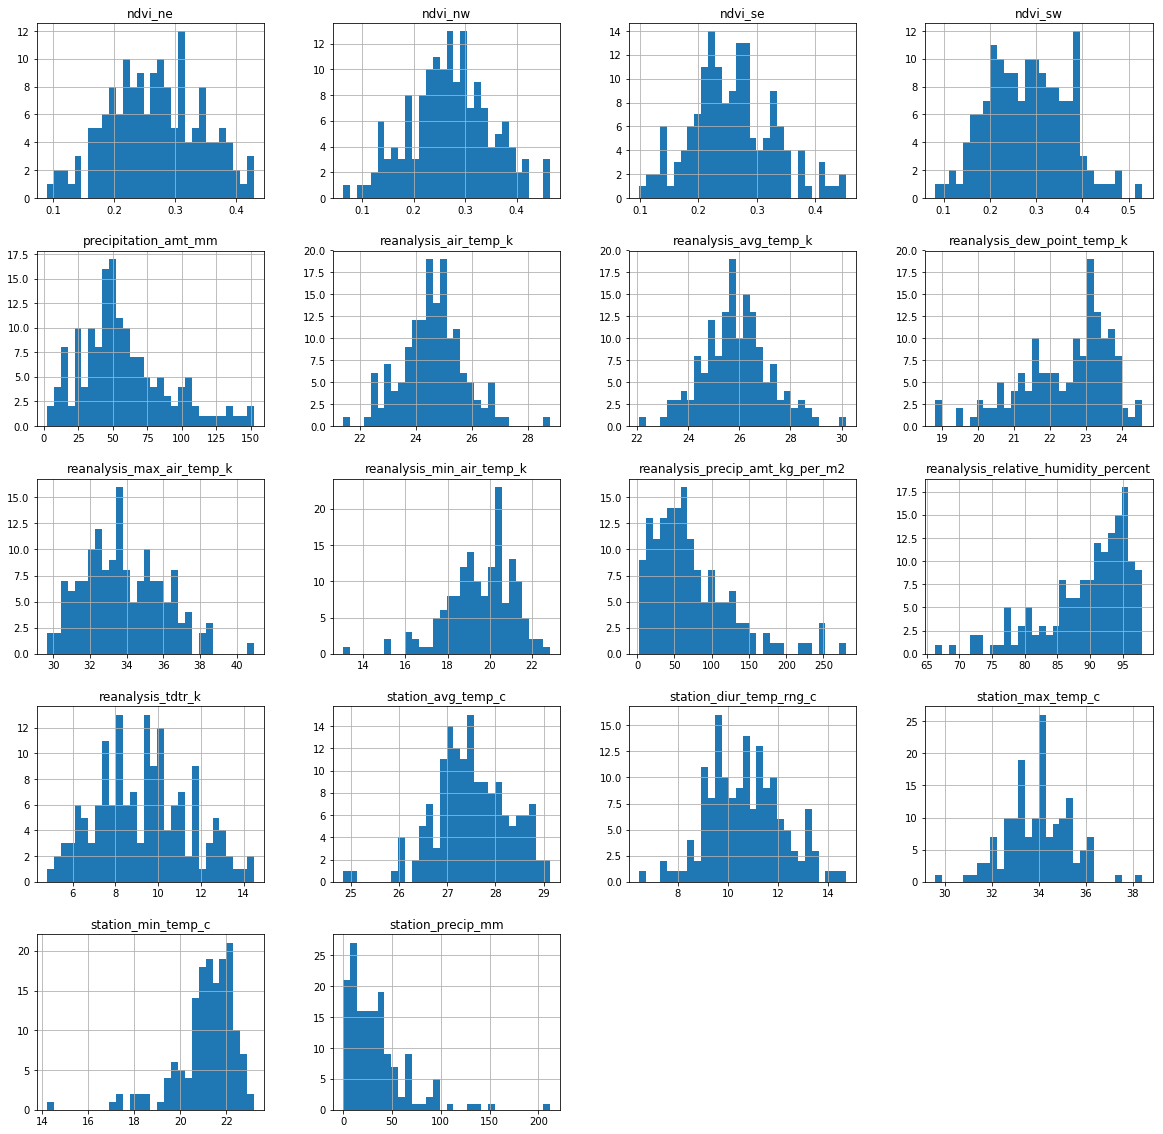

In [20]:
_ = dftest_iq.hist(bins=30, figsize=(20,20))

#### Analyze distributions: normal/not normal?  skewed?  which way?

In [21]:
#scipy.stats.skew(a, axis=0, bias=True)
cols = dftest_iq.columns
normal_cols = list()
not_normal_cols = list()
for col in dftest_iq.columns:
    _, pvalue = sp.stats.skewtest(dftest_iq[col].values)
    skewness = sp.stats.skew(dftest_iq[col].values)
    if pvalue < 0.05:
        not_normal_cols.append((col, pvalue, skewness))
    else:
        normal_cols.append((col, pvalue, skewness))
    
print('Not normal columns\tpvalue\tskewness:')
for col, pvalue, skewness in not_normal_cols:
    print(col, '\t', round(pvalue,2), '\t', round(skewness,2))
    
print('\nNormal columns\tpvalue\tskewness:')
for col, pvalue, skewness in normal_cols:
    print(col, '\t', round(pvalue,2), '\t', round(skewness,2))

Not normal columns	pvalue	skewness:
precipitation_amt_mm 	 0.0 	 0.82
reanalysis_dew_point_temp_k 	 0.0 	 -0.76
reanalysis_max_air_temp_k 	 0.04 	 0.4
reanalysis_min_air_temp_k 	 0.0 	 -0.84
reanalysis_precip_amt_kg_per_m2 	 0.0 	 1.45
reanalysis_relative_humidity_percent 	 0.0 	 -1.15
station_min_temp_c 	 0.0 	 -1.81
station_precip_mm 	 0.0 	 2.12

Normal columns	pvalue	skewness:
ndvi_ne 	 0.95 	 -0.01
ndvi_nw 	 0.96 	 0.01
ndvi_se 	 0.09 	 0.32
ndvi_sw 	 0.43 	 0.15
reanalysis_air_temp_k 	 0.34 	 0.18
reanalysis_avg_temp_k 	 0.53 	 0.12
reanalysis_tdtr_k 	 0.31 	 0.19
station_avg_temp_c 	 0.15 	 -0.28
station_diur_temp_rng_c 	 0.51 	 0.13
station_max_temp_c 	 1.0 	 -0.0


#### Update outliers for non normal distributions

In [22]:
# update outliers for non-normal distributions
for col, _, skewness in not_normal_cols:
    allvals = dftest_iq[col].values
    if skewness >= 1:
        #print('right tail')
        # if skewness >= 1 consider distribution long tail
        # squoosh long tail to 95% percentile value of original distribution
        maxallowed = np.percentile(allvals, 95)
        dftest_iq.loc[dftest_iq[col] > maxallowed, col] = maxallowed
    elif skewness <= -1:
        #print('left tail')
        # if skewness <= -1 consider distribution long tail
        # squoosh long tail to 5% percentile value of original distribution
        minallowed = np.percentile(allvals, 5)
        dftest_iq.loc[dftest_iq[col] < minallowed, col] = minallowed
    elif abs(skewness) < 1:
        #print('two sided')
        # mild skewness, squoosh outliers on both tails
        maxallowed = np.percentile(allvals, 97.5)
        dftest_iq.loc[dftest_iq[col] > maxallowed, col] = maxallowed
        minallowed = np.percentile(allvals, 2.5)
        dftest_iq.loc[dftest_iq[col] < minallowed, col] = minallowed


#### Update outliers for normal distributions

In [23]:
from outliers import smirnov_grubbs as grubbs

# for normal distributions, use two tail grubbs test to find outliers, if any
for col, _, skewness in normal_cols:
    #print(col)
    allvals = dftest_iq[col].values
    allvalset = set(allvals)
    invalset = set(grubbs.test(allvals, alpha=0.05))
    outliers = allvalset - invalset
    maxallowed = max(invalset)
    minallowed = min(invalset)
    if len(outliers):
        #print(outliers)
        #print(maxallowed)
        #print(minallowed)
        dftest_iq.loc[dftest_iq[col] > maxallowed, col] = maxallowed
        dftest_iq.loc[dftest_iq[col] < minallowed, col] = minallowed

#### View results

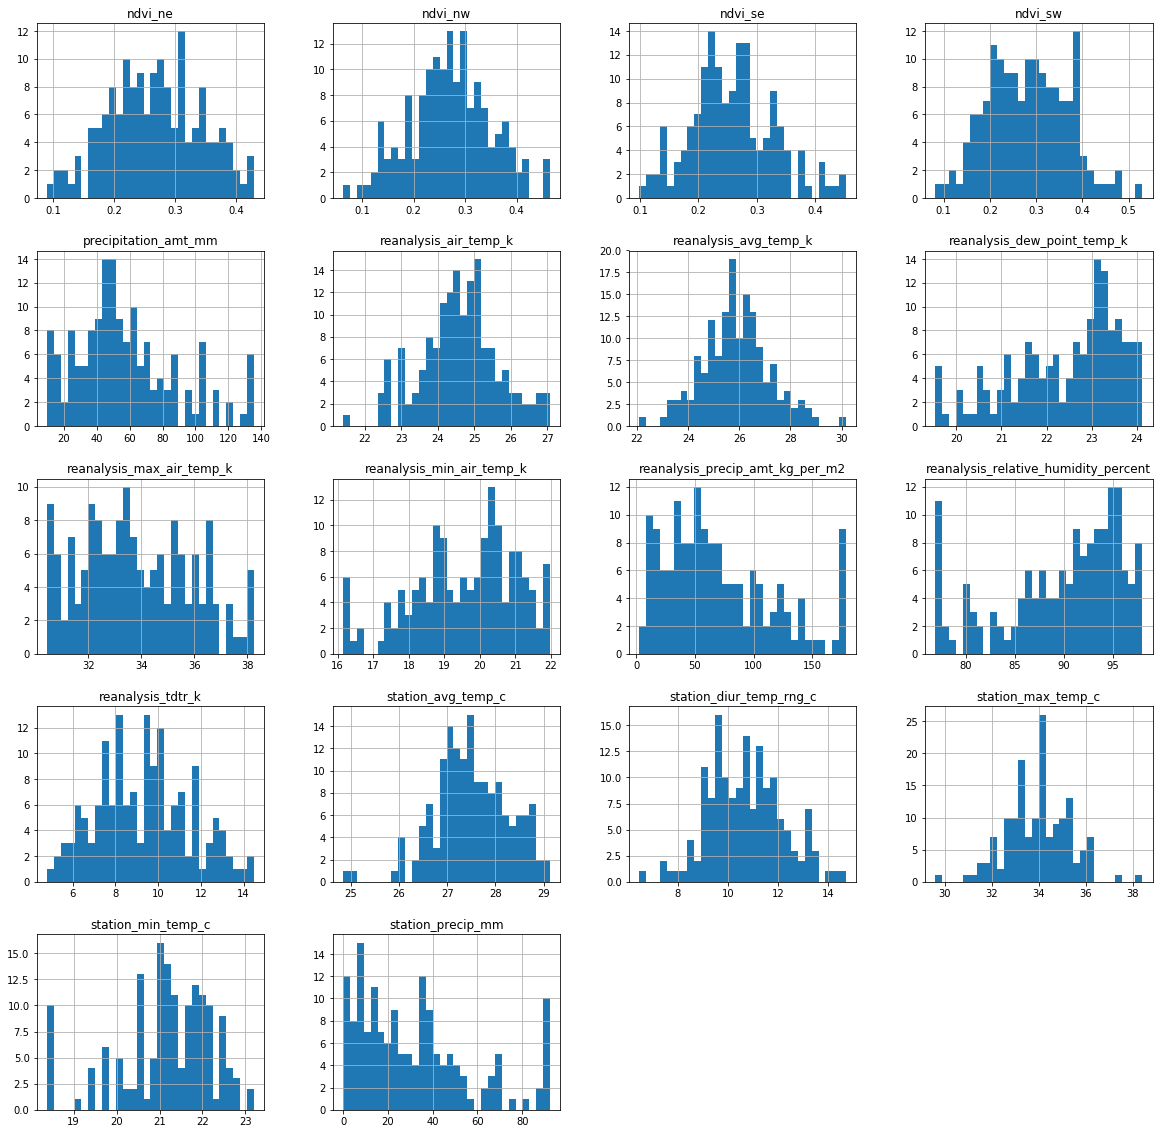

In [24]:
_ = dftest_iq.hist(bins=30, figsize=(20,20))

## Save test data

In [25]:
dftest_iq.to_csv('data/dengue_features_test_no_outliers_iq.csv')

In [26]:
dftest_iq.index.size

156